In [36]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import warnings
import warnings
warnings.filterwarnings("ignore")
import re

In [37]:
#loading train and test data
train_data=pd.read_excel(r"E:\Project\doctor_prediction_train.xlsx")
test_data=pd.read_excel(r"E:\Project\Doctor_prediction_test.xlsx")

# Train data

In [38]:
#seeing rows of train data
train_data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [39]:
#loading columns
train_data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [40]:
#checking info of train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 186.3+ KB


In [41]:
#checking null values
train_data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [42]:
#imputing null value with mode bec its a categorical data
for col in ["Rating","Place","Miscellaneous_Info"]:
    train_data[col].fillna(train_data[col].mode()[0],inplace=True)
    


In [43]:
train_data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,100%,"Nungambakkam, Chennai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


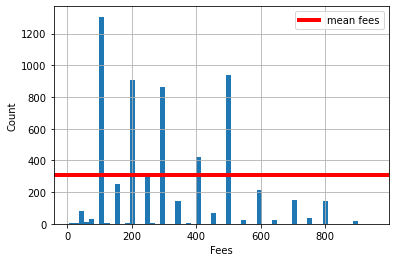

In [44]:
Fees=train_data["Fees"].hist(bins=60)
mean_val=np.mean(train_data["Fees"])
plt.axhline(mean_val,linewidth=4,color="red",label="mean fees")
plt.xlabel("Fees")
plt.ylabel("Count")
plt.legend()
plt.show()

# Exploring Data Variable

In [45]:
for column in train_data.columns:
    if train_data[column].dtype==object:
        print(str(column)+ " : "+str(train_data[column].unique()))
        print(train_data[column].value_counts())
        print("**********************************************************************************************")
        print("/n")
    

Qualification : ['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']
BDS                                                                                                       488
BHMS                                                                                                      477
BAMS                                                                                                      471
MBBS                                                                                                      334
MBBS, MS - ENT                                                                                            220
                                                                                            

# EDA

In [46]:
print(train_data["Qualification"].value_counts())

BDS                                                                                                       488
BHMS                                                                                                      477
BAMS                                                                                                      471
MBBS                                                                                                      334
MBBS, MS - ENT                                                                                            220
                                                                                                         ... 
BDS, MDS - Orthodontics, D.Sc                                                                               1
BHMS, PGCR                                                                                                  1
MBBS, Fellowship in Endocrinology, Diabetes & Metabolism                                                    1
Post Gradu

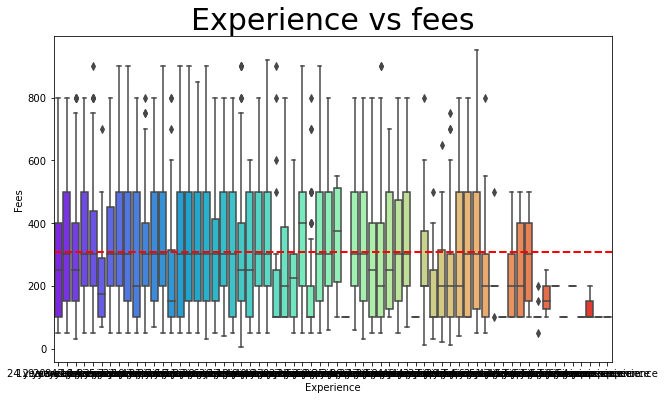

In [47]:
plt.figure(figsize=(10,6))
mean_fees=np.mean(train_data["Fees"])
sns.boxplot(x="Experience",y="Fees",data=train_data,palette="rainbow")
plt.axhline(mean_fees,color="r",linestyle="dashed",linewidth=2)
plt.title("Experience vs fees",fontsize=30)
plt.xticks(rotation="horizontal")
plt.show()

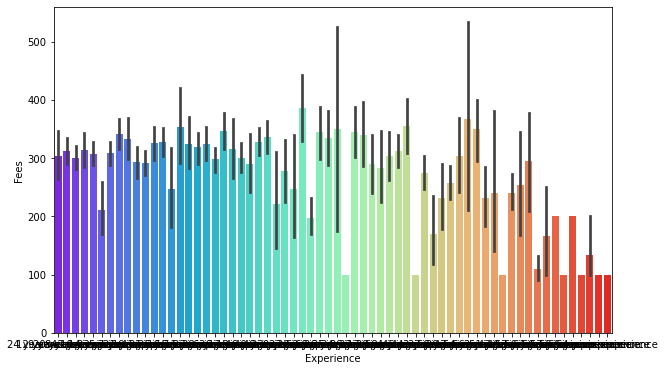

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

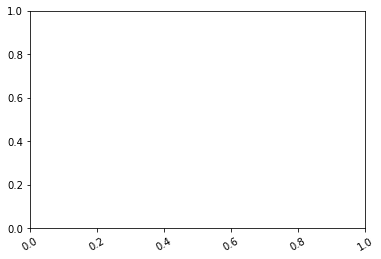

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(x="Experience",y="Fees",data=train_data,palette="rainbow")
plt.show()
plt.xticks(rotation=30)

In [49]:
print(train_data["Experience"].value_counts())

9 years experience     323
10 years experience    294
11 years experience    288
8 years experience     282
12 years experience    279
                      ... 
59 years experience      1
61 years experience      1
66 years experience      1
60 years experience      1
65 years experience      1
Name: Experience, Length: 64, dtype: int64


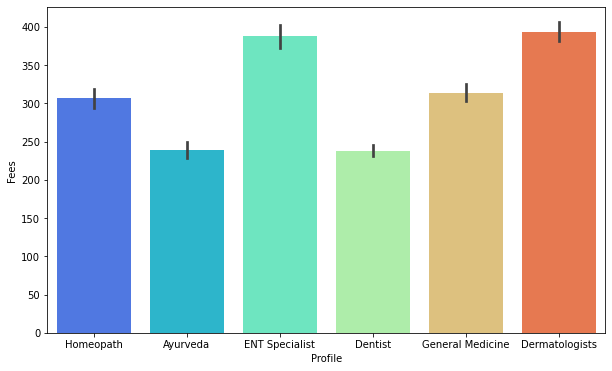

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(x="Profile",y="Fees",data=train_data,palette="rainbow")
plt.show()

In [51]:
print(train_data.groupby("Profile")["Fees"].unique())

Profile
Ayurveda            [350, 250, 100, 300, 500, 150, 50, 200, 400, 6...
Dentist             [200, 100, 350, 500, 400, 250, 300, 150, 80, 5...
Dermatologists      [100, 500, 400, 650, 350, 600, 700, 250, 200, ...
ENT Specialist      [300, 700, 500, 100, 400, 600, 350, 200, 800, ...
General Medicine    [100, 200, 150, 500, 250, 50, 300, 800, 400, 7...
Homeopath           [100, 200, 300, 500, 150, 350, 250, 600, 400, ...
Name: Fees, dtype: object


In [52]:
print(train_data["Qualification"].unique())

['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']


In [53]:
print(train_data["Miscellaneous_Info"].value_counts())

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                      2660
Tooth Extraction Dental Fillings Scaling / Polishing                                      12
Dental Fillings Zirconia Crowns Dental Implant Fixing                                     12
Skin Disease Treatment Kidney Stone Treatment Gall Bladder (Biliary) Stone Treatment       9
Skin Allergy Treatment Skin Allergies Dermabrasion                                         9
                                                                                        ... 
100% 173 Feedback Bhandup West, Mumbai                                                     1
94% 21 Feedback Vijayanagar, Bangalore                                                     1
85% 506 Feedback Lajpat Nagar, Delhi                                                       1
Gum Disease Treatment/ Surgery RCT - Root Canal Treatment Scaling / Polishing              1
Skin Allergies Allergy Treatment Skin Tag Treatment                   

In [54]:
print(train_data["Qualification"].value_counts())

BDS                                                                                                       488
BHMS                                                                                                      477
BAMS                                                                                                      471
MBBS                                                                                                      334
MBBS, MS - ENT                                                                                            220
                                                                                                         ... 
BDS, MDS - Orthodontics, D.Sc                                                                               1
BHMS, PGCR                                                                                                  1
MBBS, Fellowship in Endocrinology, Diabetes & Metabolism                                                    1
Post Gradu

In [55]:
print(train_data["Place"].value_counts())

HSR Layout, Bangalore          100
Andheri West, Mumbai            70
Dwarka, Delhi                   67
Banjara Hills, Hyderabad        64
Mulund West, Mumbai             54
                              ... 
Maduravoyal, Chennai             1
Hebbal Kempapura, Bangalore      1
Yakutpura, Hyderabad             1
Kilokri, Delhi                   1
Mumbai Central, Mumbai           1
Name: Place, Length: 877, dtype: int64


In [56]:
print(train_data["Rating"].unique())

['100%' '98%' '99%' '79%' '95%' '97%' '94%' '88%' '90%' '80%' '93%' '36%'
 '78%' '87%' '96%' '82%' '89%' '74%' '86%' '92%' '83%' '76%' '85%' '56%'
 '91%' '68%' '60%' '75%' '69%' '73%' '67%' '77%' '33%' '55%' '71%' '84%'
 '45%' '63%' '72%' '81%' '62%' '57%' '7%' '48%' '40%' '70%' '64%' '65%'
 '47%' '58%' '53%']


In [57]:
print(train_data["Place"].unique())

['Kakkanad, Ernakulam' 'Whitefield, Bangalore'
 'Mathikere - BEL, Bangalore' 'Bannerghatta Road, Bangalore'
 'Keelkattalai, Chennai' 'Porur, Chennai' 'Karol Bagh, Delhi'
 'Arekere, Bangalore' 'Old City, Hyderabad' 'Athani, Ernakulam'
 'Thousand Lights, Chennai' 'Somajiguda, Hyderabad'
 'Coimbatore Racecourse, Coimbatore' 'Jubilee Hills, Hyderabad'
 'Kondli, Delhi' 'Saroor Nagar, Hyderabad' 'Tambaram West, Chennai'
 'Purasawakkam, Chennai' 'KPHB, Hyderabad' 'HSR Layout, Bangalore'
 'Pollachi, Coimbatore' 'Vasundhra Enclave, Delhi' 'Chembur, Mumbai'
 'Thammanam, Ernakulam' 'Andheri, Mumbai' 'Pattom, Thiruvananthapuram'
 'Kukatpally, Hyderabad' 'Vadavalli, Coimbatore' 'Defence Colony, Delhi'
 'Banjara Hills, Hyderabad' 'Sion West, Mumbai' 'CR Park, Delhi'
 'Mogappair East, Chennai' 'IP Extension, Delhi'
 'Safdarjung Enclave, Delhi' 'New Friends Colony, Delhi'
 'Borivali West, Mumbai' 'Saket, Delhi' 'Malad, Mumbai'
 'Hyder Nagar, Hyderabad' 'Dahisar West, Mumbai' 'RT Nagar, Bangalore'
 'Po

# Handaling Categorical Data

In [58]:
#converting the data categorical into numerical by APPLING labelencoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data["Qualification"]=le.fit_transform(train_data["Qualification"])
train_data["Place"]=le.fit_transform(train_data["Place"])

In [59]:
train_data["Miscellaneous_Info"]=le.fit_transform(train_data["Miscellaneous_Info"])

In [60]:
train_data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,401,24 years experience,100%,299,Homeopath,130,100
1,73,12 years experience,98%,866,Ayurveda,1422,350
2,1135,9 years experience,100%,457,ENT Specialist,1595,300
3,464,12 years experience,100%,68,Ayurveda,1695,250
4,10,20 years experience,100%,337,Ayurveda,253,250
...,...,...,...,...,...,...,...
5956,1075,19 years experience,98%,70,ENT Specialist,1385,300
5957,596,33 years experience,100%,541,General Medicine,1595,100
5958,596,41 years experience,97%,216,General Medicine,1173,600
5959,943,15 years experience,90%,850,General Medicine,2202,100


In [61]:
#converted experience by applying lambda
train_data['Experience'] = train_data['Experience'].apply(lambda x : re.findall(r'^\d\d?', x)[0]).astype(int)

In [62]:
#converted Rating by appling filling float
train_data["Rating"]=train_data["Rating"].str[0:-1].astype(float)

In [63]:
train_data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,401,24,100.0,299,Homeopath,130,100
1,73,12,98.0,866,Ayurveda,1422,350
2,1135,9,100.0,457,ENT Specialist,1595,300
3,464,12,100.0,68,Ayurveda,1695,250
4,10,20,100.0,337,Ayurveda,253,250
...,...,...,...,...,...,...,...
5956,1075,19,98.0,70,ENT Specialist,1385,300
5957,596,33,100.0,541,General Medicine,1595,100
5958,596,41,97.0,216,General Medicine,1173,600
5959,943,15,90.0,850,General Medicine,2202,100


In [70]:
#using one hot encodder
Profile=train_data["Profile"]
Profile=pd.get_dummies(Profile,drop_first=True)

In [71]:
train=pd.concat([train_data,Profile],axis=1)

In [72]:
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,401,24,100.0,299,Homeopath,130,100,0,0,0,0,1
1,73,12,98.0,866,Ayurveda,1422,350,0,0,0,0,0
2,1135,9,100.0,457,ENT Specialist,1595,300,0,0,1,0,0
3,464,12,100.0,68,Ayurveda,1695,250,0,0,0,0,0
4,10,20,100.0,337,Ayurveda,253,250,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5956,1075,19,98.0,70,ENT Specialist,1385,300,0,0,1,0,0
5957,596,33,100.0,541,General Medicine,1595,100,0,0,0,1,0
5958,596,41,97.0,216,General Medicine,1173,600,0,0,0,1,0
5959,943,15,90.0,850,General Medicine,2202,100,0,0,0,1,0


In [73]:
#now i will drop profile it is no use
train.drop(["Profile"],axis=1,inplace=True)

In [74]:
train

,Qualification,Experience,Rating,Place,Miscellaneous_Info,Fees,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,401,24,100.0,299,130,100,0,0,0,0,1
1,73,12,98.0,866,1422,350,0,0,0,0,0
2,1135,9,100.0,457,1595,300,0,0,1,0,0
3,464,12,100.0,68,1695,250,0,0,0,0,0
4,10,20,100.0,337,253,250,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5956,1075,19,98.0,70,1385,300,0,0,1,0,0
5957,596,33,100.0,541,1595,100,0,0,0,1,0
5958,596,41,97.0,216,1173,600,0,0,0,1,0
5959,943,15,90.0,850,2202,100,0,0,0,1,0


# Now all Columns change into numerics now we will repeat some step in test data

# TEST DATA

In [75]:
#loading test data
test_data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [76]:
#checking columns
test_data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [77]:
#checking test data info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 46.6+ KB


In [78]:
#checking null values
test_data.isnull().values.any()

True

In [79]:
test_data.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [81]:
#imputing null value with mode
for col in ["Rating","Place","Miscellaneous_Info"]:
    test_data[col].fillna(test_data[col].mode()[0],inplace=True)


In [82]:
test_data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,100%,"Ghatkopar East, Mumbai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,100%,"West Marredpally, Hyderabad",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,100%,"New Ashok Nagar, Delhi",Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,100%,"Basavanagudi, Bangalore",Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,100%,"Choolai, Chennai",Dermatologists,Acrylic Partial Denture Crowns and Bridges Fix...
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,100%,"Porur, Chennai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [83]:
#checking columns unique
print(test_data["Qualification"].unique())

['MBBS' 'MBBS, Diploma in Otorhinolaryngology (DLO)' 'MBBS, DDVL' 'BAMS'
 'BDS, MDS - Conservative Dentistry & Endodontics' 'BDS, MDS'
 'BDS, MDS - Pedodontics'
 'MD - Ayurveda Medicine, BAMS, Yoga Teachers Training Course, M. D. IN KAYACHIKISTA'
 'BHMS' 'BDS' 'MBBS, FCD - Diabetology' 'MBBS, DDV'
 'MBBS, MD - Dermatology' 'MS - ENT'
 'MBBS, Diploma in Otorhinolaryngology (DLO), MS - ENT, DNB - ENT, MNAMS (Membership of the National Academy)'
 'BHMS, Diploma in Naturopathy & Yogic Science (DNYS), Diploma in Diet and Nutrition, Diploma in Cosmetology'
 'MBBS, PG Diploma In Clinical Cosmetology (PGDCC)'
 'BDS, MDS - Periodontics' 'BDS, MDS- Oral Pathology'
 'MBBS, MD - General Medicine' 'MS - ENT, MBBS'
 'MBBS, Diploma in Otorhinolaryngology (DLO), DNB - ENT'
 'MBBS, MS - ENT, DNB - Otorhinolaryngology'
 'BDS, PhD - Endodontics, MDS - Conservative Dentistry & Endodontics'
 'BSc, LCEH' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, DGO, MD - Obstetrics & Gynaecology' 'BHMS, MD - Homeopathy'
 'BHM

In [84]:
print(test_data["Experience"].unique())

['35 years experience' '31 years experience' '40 years experience'
 '0 years experience' '16 years experience' '14 years experience'
 '23 years experience' '9 years experience' '11 years experience'
 '44 years experience' '4 years experience' '34 years experience'
 '13 years experience' '28 years experience' '6 years experience'
 '32 years experience' '3 years experience' '8 years experience'
 '43 years experience' '27 years experience' '22 years experience'
 '25 years experience' '36 years experience' '17 years experience'
 '20 years experience' '18 years experience' '29 years experience'
 '5 years experience' '19 years experience' '10 years experience'
 '2 years experience' '30 years experience' '24 years experience'
 '26 years experience' '41 years experience' '46 years experience'
 '21 years experience' '12 years experience' '45 years experience'
 '33 years experience' '38 years experience' '7 years experience'
 '59 years experience' '15 years experience' '39 years experience'
 '42

In [87]:
print(test_data["Rating"].unique())

['100%' '70%' '90%' '94%' '99%' '98%' '87%' '64%' '96%' '95%' '97%' '93%'
 '69%' '71%' '83%' '92%' '80%' '86%' '88%' '67%' '85%' '84%' '55%' '89%'
 '82%' '81%' '60%' '73%' '65%' '77%' '91%' '78%' '79%' '76%' '52%' '53%']


In [88]:
print(test_data["Place"].unique())

['Ghatkopar East, Mumbai' 'West Marredpally, Hyderabad'
 'KK Nagar, Chennai' 'New Ashok Nagar, Delhi' 'Kanakpura Road, Bangalore'
 'Velachery, Chennai' 'Frazer Town, Bangalore' 'Attapur, Hyderabad'
 'Banashankari, Bangalore' 'Mayur Vihar Ph-I, Delhi'
 'Erragadda, Hyderabad' 'Gandhipuram, Coimbatore' 'Kemps Corner, Mumbai'
 'Banjara Hills, Hyderabad' 'Madandapuram, Chennai'
 'Mukherjee Nagar, Delhi' 'Tis Hazari, Delhi'
 'Banashankari 2nd Stage, Bangalore' 'Nagawara, Bangalore'
 'Basavanagudi, Bangalore' 'Dadar, Mumbai' 'Kattakada, Thiruvananthapuram'
 'Villivakkam, Chennai' 'Begumpet, Hyderabad' 'Kottivakkam, Chennai'
 'Jeedimetla, Hyderabad' 'Gachibowli, Hyderabad' 'Chromepet, Chennai'
 'Mulund West, Mumbai' 'Bellandur, Bangalore' 'Kukatpally, Hyderabad'
 'Chandni Chowk, Delhi' 'Vileparle West, Mumbai' 'Sakinaka, Mumbai'
 'Bannerghatta Road, Bangalore' 'Marathahalli, Bangalore'
 'Kolathur, Chennai' 'Jayanagar 9 Block, Bangalore'
 'Dilsukhnagar, Hyderabad' 'Dahisar East, Mumbai' 'Keelka

In [89]:
print(test_data["Profile"].unique())

['General Medicine' 'ENT Specialist' 'Dermatologists' 'Ayurveda' 'Dentist'
 'Homeopath']


# Handaling Categorical Data Of Test

In [90]:
#converting categorical by encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test_data["Qualification"]=le.fit_transform(test_data["Qualification"])
test_data["Place"]=le.fit_transform(test_data["Place"])
test_data["Miscellaneous_Info"]=le.fit_transform(test_data["Miscellaneous_Info"])

In [92]:
#converting experience by applying lambda
test_data["Experience"]=test_data["Experience"].apply(lambda x : re.findall(r"^\d\d?", x)[0]).astype(int)

In [93]:
test_data["Rating"]=test_data["Rating"].str[0:-1].astype(float)

In [94]:
#using one hot encoder
Profile=test_data["Profile"]
Profile=pd.get_dummies(Profile,drop_first=True)

In [95]:
test=pd.concat([test_data,Profile])

In [96]:
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,241.0,35.0,100.0,142.0,General Medicine,598.0,NaN,NaN,NaN,NaN,NaN
1,340.0,31.0,100.0,580.0,ENT Specialist,598.0,NaN,NaN,NaN,NaN,NaN
2,258.0,40.0,70.0,212.0,Dermatologists,153.0,NaN,NaN,NaN,NaN,NaN
3,6.0,0.0,100.0,374.0,Ayurveda,598.0,NaN,NaN,NaN,NaN,NaN
4,79.0,16.0,100.0,231.0,Dentist,816.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1982,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1983,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0
1984,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0
1985,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0


In [97]:
#i will drop the profile it is no use
test.drop(["Profile"],axis=1,inplace=True)

In [98]:
test

,Qualification,Experience,Rating,Place,Miscellaneous_Info,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,241.0,35.0,100.0,142.0,598.0,NaN,NaN,NaN,NaN,NaN
1,340.0,31.0,100.0,580.0,598.0,NaN,NaN,NaN,NaN,NaN
2,258.0,40.0,70.0,212.0,153.0,NaN,NaN,NaN,NaN,NaN
3,6.0,0.0,100.0,374.0,598.0,NaN,NaN,NaN,NaN,NaN
4,79.0,16.0,100.0,231.0,816.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1982,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1983,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0
1984,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0
1985,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0


In [99]:
test.dtypes

Qualification         float64
Experience            float64
Rating                float64
Place                 float64
Miscellaneous_Info    float64
Dentist               float64
Dermatologists        float64
ENT Specialist        float64
General Medicine      float64
Homeopath             float64
dtype: object

In [100]:
for col in ["Qualification","Experience","Rating","Place","Miscellaneous_Info","Dentist","Dermatologists","ENT Specialist",
           "General Medicine","Homeopath"]:
    test[col].fillna(test[col].mean(),inplace=True)

In [101]:
test

,Qualification,Experience,Rating,Place,Miscellaneous_Info,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,241.000000,35.000000,100.000000,142.000000,598.000000,0.221943,0.170609,0.118269,0.223452,0.139406
1,340.000000,31.000000,100.000000,580.000000,598.000000,0.221943,0.170609,0.118269,0.223452,0.139406
2,258.000000,40.000000,70.000000,212.000000,153.000000,0.221943,0.170609,0.118269,0.223452,0.139406
3,6.000000,0.000000,100.000000,374.000000,598.000000,0.221943,0.170609,0.118269,0.223452,0.139406
4,79.000000,16.000000,100.000000,231.000000,816.000000,0.221943,0.170609,0.118269,0.223452,0.139406
...,...,...,...,...,...,...,...,...,...,...
1982,259.979869,17.874685,97.490689,288.894313,573.318067,0.000000,0.000000,0.000000,0.000000,0.000000
1983,259.979869,17.874685,97.490689,288.894313,573.318067,0.000000,1.000000,0.000000,0.000000,0.000000
1984,259.979869,17.874685,97.490689,288.894313,573.318067,0.000000,0.000000,0.000000,1.000000,0.000000
1985,259.979869,17.874685,97.490689,288.894313,573.318067,1.000000,0.000000,0.000000,0.000000,0.000000


# Now all the categorical data turn into numeric in test data

# summary_statistic

In [103]:
train.describe()

,Qualification,Experience,Rating,Place,Miscellaneous_Info,Fees,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,17.303976,97.610636,414.368059,1573.343902,307.944640,0.234357,0.173461,0.122127,0.196779,0.141419
std,413.842446,11.142798,5.881539,258.547684,640.388185,190.920373,0.423632,0.378677,0.327460,0.397597,0.348483
min,0.000000,0.000000,7.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,219.000000,9.000000,98.000000,197.000000,1477.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,596.000000,14.000000,100.000000,407.000000,1595.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,943.000000,23.000000,100.000000,628.000000,1746.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1419.000000,66.000000,100.000000,876.000000,2997.000000,950.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Correlation

In [104]:
corr=train.corr()

In [105]:
corr

,Qualification,Experience,Rating,Place,Miscellaneous_Info,Fees,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
Qualification,1.000000,0.134697,-0.163692,0.006640,-0.132786,0.263214,-0.337442,0.272924,0.361955,0.303611,-0.143698
Experience,0.134697,1.000000,-0.149594,0.015963,-0.132561,0.002117,-0.201596,-0.096003,0.082435,0.335864,-0.070010
Rating,-0.163692,-0.149594,1.000000,0.031443,0.286558,-0.154713,0.088683,-0.125989,-0.131420,-0.034173,0.093751
Place,0.006640,0.015963,0.031443,1.000000,0.027901,-0.052505,0.024988,-0.040533,-0.001649,0.050087,-0.014662
Miscellaneous_Info,-0.132786,-0.132561,0.286558,0.027901,1.000000,-0.060713,0.332886,-0.146775,-0.078703,-0.080169,-0.047390
Fees,0.263214,0.002117,-0.154713,-0.052505,-0.060713,1.000000,-0.202126,0.204426,0.155084,0.015463,-0.003072
Dentist,-0.337442,-0.201596,0.088683,0.024988,0.332886,-0.202126,1.000000,-0.253451,-0.206355,-0.273840,-0.224538
Dermatologists,0.272924,-0.096003,-0.125989,-0.040533,-0.146775,0.204426,-0.253451,1.000000,-0.170867,-0.226747,-0.185923
ENT Specialist,0.361955,0.082435,-0.131420,-0.001649,-0.078703,0.155084,-0.206355,-0.170867,1.000000,-0.184613,-0.151375
General Medicine,0.303611,0.335864,-0.034173,0.050087,-0.080169,0.015463,-0.273840,-0.226747,-0.184613,1.000000,-0.200879


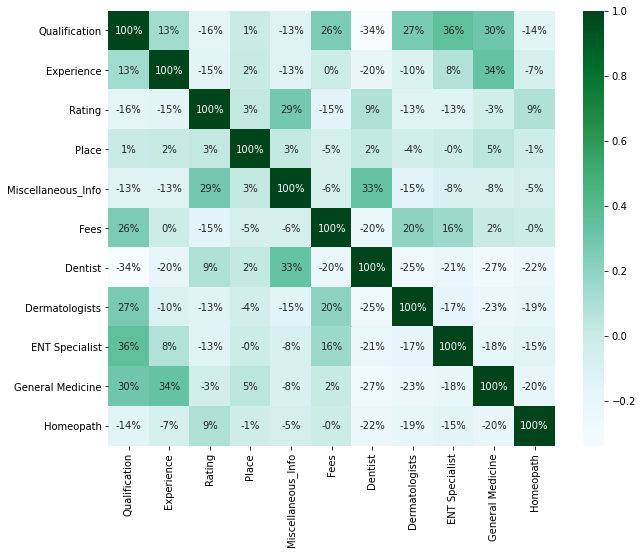

In [108]:
#checking correlation by visiulization
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt=".0%",cmap="BuGn")

# Corelation with target variable by droping from axis

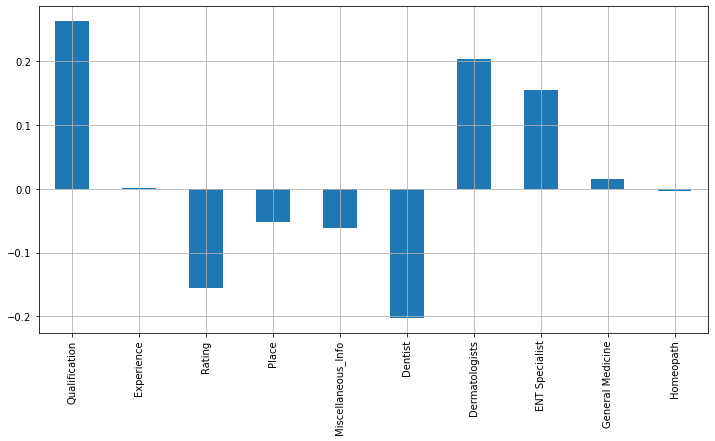

In [109]:
plt.figure(figsize=(12,6))
train.drop("Fees",axis=1).corrwith(train["Fees"]).plot(kind="bar",grid=True)
plt.xticks(rotation="vertical")
plt.show()

# Ploting Outliers:

Qualification            AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Experience            AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Rating                AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Place                 AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Miscellaneous_Info    AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Fees                  AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Dentist               AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Dermatologists              AxesSubplot(0.125,0.125;0.0945122x0.343182)
ENT Specialist           AxesSubplot(0.238415,0.125;0.0945122x0.343182)
General Medicine         AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Homeopath                AxesSubplot(0.465244,0.125;0.0945122x0.343182)
dtype: object

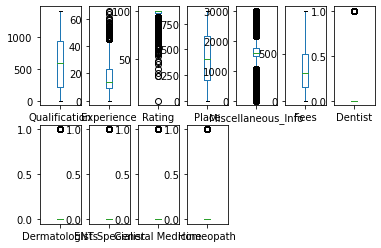

In [114]:
train.plot(kind="box",subplots=True,layout=(2,7))

# Removing Outliers:

In [115]:
from scipy.stats import zscore

In [116]:
z=np.abs(zscore(train))
z

array([[4.73305738e-01, 6.00978850e-01, 4.06282226e-01, ...,
        3.72984103e-01, 4.94962088e-01, 2.46397532e+00],
       [1.26594438e+00, 4.76040293e-01, 6.62066312e-02, ...,
        3.72984103e-01, 4.94962088e-01, 4.05848221e-01],
       [1.30046489e+00, 7.45295079e-01, 4.06282226e-01, ...,
        2.68107941e+00, 4.94962088e-01, 4.05848221e-01],
       ...,
       [2.07239780e-03, 2.12675597e+00, 1.03831166e-01, ...,
        3.72984103e-01, 2.02035676e+00, 4.05848221e-01],
       [8.36481290e-01, 2.06785507e-01, 1.29409575e+00, ...,
        3.72984103e-01, 2.02035676e+00, 4.05848221e-01],
       [8.55125573e-01, 2.72823168e-02, 4.06282226e-01, ...,
        3.72984103e-01, 4.94962088e-01, 4.05848221e-01]])

In [117]:
print(np.where(z>3))

(array([  18,   55,   67,  105,  110,  140,  178,  183,  209,  275,  293,
        309,  325,  333,  372,  377,  458,  465,  585,  590,  632,  692,
        731,  787,  788,  810,  815,  851,  901,  911,  918,  968,  979,
        987,  990,  998, 1009, 1016, 1018, 1111, 1170, 1240, 1303, 1314,
       1392, 1425, 1433, 1437, 1444, 1475, 1592, 1594, 1614, 1631, 1635,
       1648, 1717, 1741, 1743, 1747, 1778, 1796, 1852, 1860, 1877, 1937,
       1981, 2023, 2062, 2089, 2161, 2165, 2202, 2252, 2262, 2277, 2281,
       2309, 2323, 2391, 2393, 2428, 2478, 2500, 2522, 2548, 2585, 2623,
       2631, 2646, 2670, 2708, 2715, 2726, 2738, 2758, 2829, 2833, 2962,
       2991, 3093, 3120, 3126, 3144, 3180, 3222, 3254, 3270, 3295, 3333,
       3365, 3367, 3463, 3478, 3493, 3526, 3537, 3593, 3604, 3608, 3615,
       3627, 3661, 3676, 3690, 3766, 3783, 3820, 3861, 3942, 3960, 4040,
       4052, 4055, 4058, 4135, 4167, 4174, 4212, 4212, 4219, 4257, 4344,
       4459, 4474, 4478, 4509, 4581, 4608, 4609, 4

In [118]:
train_new=train[(z<3).all(axis=1)]

In [119]:
print(train.shape)
print(train_new.shape)

(5961, 11)
(5767, 11)


In [120]:
percentloss=(5961-5767)/5961*100

In [121]:
percentloss

3.2544875020969637

# 3.25 hasbeen Data loss

# checking skewness

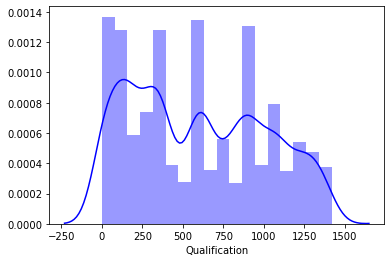

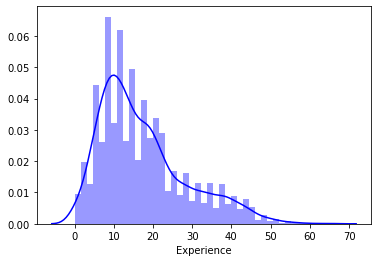

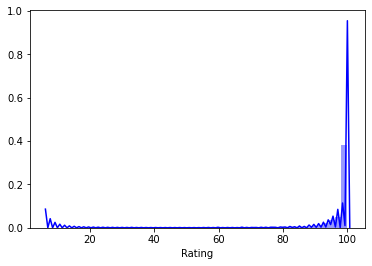

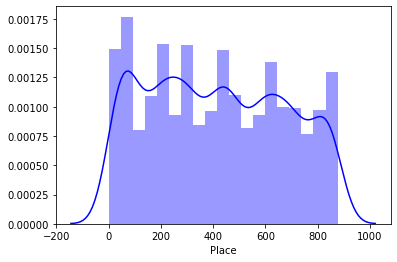

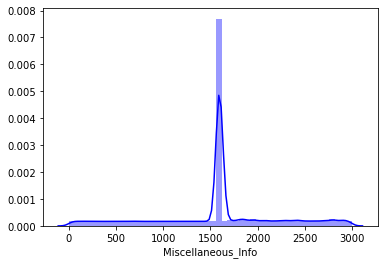

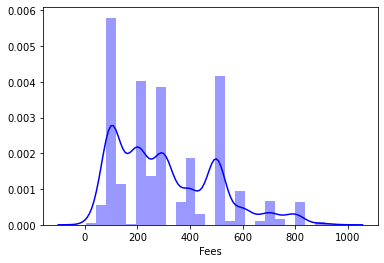

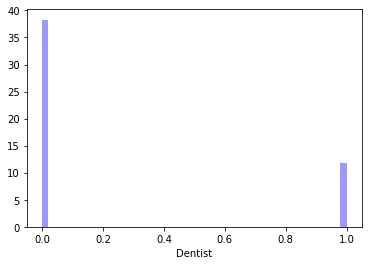

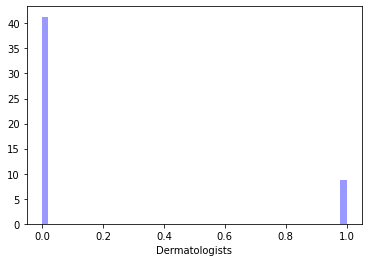

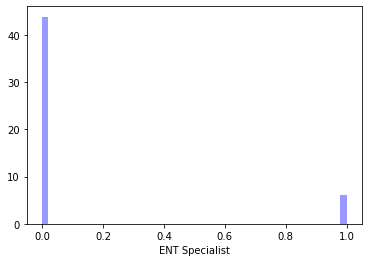

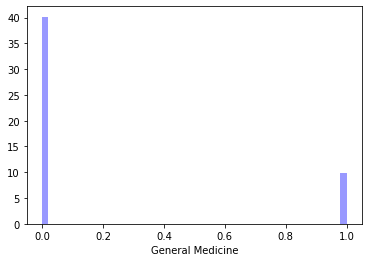

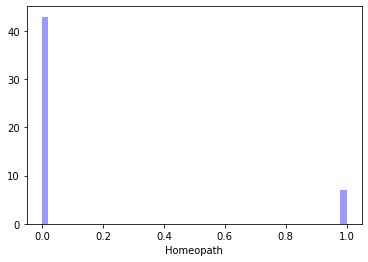

In [122]:
for col in train.describe().columns:
    sns.distplot(train[col],color="b")
    plt.show()

# Feature selection

In [123]:
x=train_new.drop(columns=["Fees"],axis=1)
y=train_new["Fees"]

In [124]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")

In [125]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [138]:
print(x_train.shape)
print(x_test.shape)

(4036, 10)
(1731, 10)


In [139]:
print(y_train.shape)
print(y_test.shape)

(4036,)
(1731,)


In [141]:
#importing all library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
#import boosting libraray
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
#import metrics library
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [146]:
#all algorithm using loop
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),
      RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("score of:",m)
    print("MAE:",mean_absolute_error(y_test,predm))
    print("MSE:",mean_squared_error(y_test,predm))
    print("RSME:",np.sqrt(mean_squared_error(y_test,predm)))
    print("R2_Score:",r2_score(y_test,predm))
    print("****************************************************************************************")
    print("/n")

score of: LinearRegression()
MAE: 140.7768067023711
MSE: 30657.591076516608
RSME: 175.09309260081224
R2_Score: 0.13692132750861696
****************************************************************************************
/n
score of: Lasso()
MAE: 141.11173310011384
MSE: 30702.615113010066
RSME: 175.22161713958147
R2_Score: 0.13565380177412634
****************************************************************************************
/n
score of: Ridge()
MAE: 140.778518941268
MSE: 30657.81678967606
RSME: 175.09373715149283
R2_Score: 0.13691497318633705
****************************************************************************************
/n
score of: ElasticNet()
MAE: 143.5064273879041
MSE: 31159.77877211266
RSME: 176.52132667786253
R2_Score: 0.12278363845878981
****************************************************************************************
/n
score of: SVR()
MAE: 140.7717894672784
MSE: 32338.883005428957
RSME: 179.83015043487273
R2_Score: 0.08958925883908386
********************

In [143]:
#cross val score
model=[LinearRegression(),SVR(),AdaBoostRegressor(),GradientBoostingRegressor()]
for n in model:
    score=cross_val_score(n,x,y,cv=10,scoring="r2")
    print("Model",n)
    print("Score",score)
    print("MEAN:",score.mean())
    print("Standard Deviation:",score.std())
    print("**************************************************************************")
    print("/n")

Model LinearRegression()
Score [0.13720081 0.13605109 0.12776541 0.08162725 0.15399572 0.13002633
 0.130081   0.11879462 0.1074344  0.1474635 ]
MEAN: 0.12704401383715855
Standard Deviation: 0.019650820758867885
**************************************************************************
/n
Model SVR()
Score [0.10711059 0.10674804 0.09106019 0.04708174 0.11108828 0.1046792
 0.07734666 0.06590625 0.07187678 0.11864587]
MEAN: 0.09015436005258518
Standard Deviation: 0.022284478408234425
**************************************************************************
/n
Model AdaBoostRegressor()
Score [0.08267043 0.09255086 0.11973694 0.10260164 0.1173565  0.10054901
 0.10956014 0.09104948 0.08568118 0.09591643]
MEAN: 0.09976726119064723
Standard Deviation: 0.012026383705647868
**************************************************************************
/n
Model GradientBoostingRegressor()
Score [0.18245121 0.1818195  0.20630594 0.15270383 0.21680421 0.21411628
 0.21586391 0.12933227 0.18668805 0.206

# GradientBoostRegressor gets best score with cross val score

In [144]:
#using grid searchcv to find best parameter
from sklearn.model_selection import GridSearchCV
Parameters={"n_estimators":[200,400,500,700],"learning_rate":[0.1,0.2,0.3]}
grb=GradientBoostingRegressor()
clf=GridSearchCV(grb,Parameters)
clf.fit(x,y)
print(clf.best_params_)

{'learning_rate': 0.1, 'n_estimators': 200}


In [145]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
grb=GradientBoostingRegressor(n_estimators=200,learning_rate=0.1,random_state=55)
grb.fit(x_train,y_train)
print("Score:",grb.score(x_train,y_train))
predgrb=grb.predict(x_test)
print("MAE:",mean_absolute_error(y_test,predgrb))
print("MSE:",mean_squared_error(y_test,predgrb))
print("RSME:",np.sqrt(mean_squared_error(y_test,predgrb)))
print("R2_Score:",r2_score(y_test,predgrb))

Score: 0.35897396239578006
MAE: 134.40780476200064
MSE: 29162.857036227844
RSME: 170.7713589458954
R2_Score: 0.17900138096096696


# Now Score is Increased


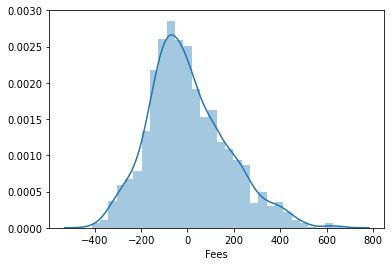

In [147]:
sns.distplot(y_test-predgrb)

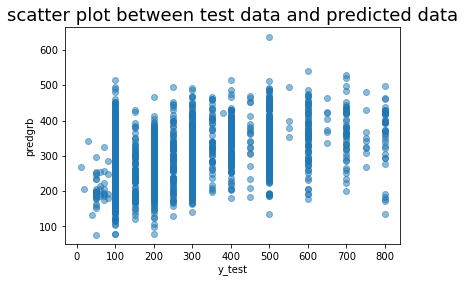

In [148]:
plt.scatter(y_test,predgrb,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("predgrb")
plt.title("scatter plot between test data and predicted data",fontsize=18)
plt.show()

# conclusion:

In [149]:
train=np.array(y_test)
predicted=np.array(grb.predict(x_test))

In [150]:
predicted=pd.DataFrame({"Train":train,"predicted":predicted},index=range(len(train)))

In [151]:
predicted

,Train,predicted
0,300,324.205736
1,300,390.730590
2,250,225.379020
3,100,196.132819
4,300,321.366550
...,...,...
1726,250,170.023318
1727,500,355.820832
1728,250,238.181565
1729,300,214.847446


In [152]:
import pickle

In [153]:
filename="prediction_fees_doctor.pkl"
pickle.dump(grb,open(filename,"wb"))

In [154]:
test

,Qualification,Experience,Rating,Place,Miscellaneous_Info,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,241.000000,35.000000,100.000000,142.000000,598.000000,0.221943,0.170609,0.118269,0.223452,0.139406
1,340.000000,31.000000,100.000000,580.000000,598.000000,0.221943,0.170609,0.118269,0.223452,0.139406
2,258.000000,40.000000,70.000000,212.000000,153.000000,0.221943,0.170609,0.118269,0.223452,0.139406
3,6.000000,0.000000,100.000000,374.000000,598.000000,0.221943,0.170609,0.118269,0.223452,0.139406
4,79.000000,16.000000,100.000000,231.000000,816.000000,0.221943,0.170609,0.118269,0.223452,0.139406
...,...,...,...,...,...,...,...,...,...,...
1982,259.979869,17.874685,97.490689,288.894313,573.318067,0.000000,0.000000,0.000000,0.000000,0.000000
1983,259.979869,17.874685,97.490689,288.894313,573.318067,0.000000,1.000000,0.000000,0.000000,0.000000
1984,259.979869,17.874685,97.490689,288.894313,573.318067,0.000000,0.000000,0.000000,1.000000,0.000000
1985,259.979869,17.874685,97.490689,288.894313,573.318067,1.000000,0.000000,0.000000,0.000000,0.000000


In [155]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
test=sc.fit_transform(test)

In [156]:
test.shape

(3974, 10)

In [157]:
Fitted_model=pickle.load(open("prediction_fees_doctor.pkl","rb"))

In [158]:
Fitted_model

GradientBoostingRegressor(n_estimators=200, random_state=55)

In [159]:
prediction=Fitted_model.predict(test)

In [160]:
prediction

array([174.91772115, 408.84150958, 468.82980808, ..., 269.58991375,
       223.56794527, 332.62646092])

# conclusion:

In [162]:
train=pd.DataFrame(predgrb,columns=["Fees"])

In [163]:
train

,Fees
0,324.205736
1,390.730590
2,225.379020
3,196.132819
4,321.366550
...,...
1726,170.023318
1727,355.820832
1728,238.181565
1729,214.847446


In [168]:
test

,0
0,174.917721
1,408.841510
2,468.829808
3,271.653384
4,310.190653
...,...
3969,270.867609
3970,332.626461
3971,269.589914
3972,223.567945
